<a href="https://colab.research.google.com/github/Ajay987654/Alpha-in-Logistic-Regression/blob/main/Alpha_in_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [ ]:

df = pd.read_csv("limited_data.csv")
X = df.drop("target", axis=1).values
y = df["target"].values
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,target
0,17.99,10.38,122.80,1001.0,0.1184,0
1,20.57,17.77,132.90,1326.0,0.0847,0
2,19.69,21.25,130.00,1203.0,0.1096,0
3,11.42,20.38,77.58,386.1,0.1425,1
4,20.29,14.34,135.10,1297.0,0.1003,0
5,12.45,15.70,82.57,477.1,0.1278,1
6,18.25,19.98,119.60,1040.0,0.0946,0
7,13.71,20.83,90.20,577.9,0.1189,1
8,13.00,21.82,87.50,519.8,0.1273,1
9,12.46,24.04,83.97,475.9,0.1186,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_test, y_train, y_test

(array([[1.825e+01, 1.998e+01, 1.196e+02, 1.040e+03, 9.460e-02],
        [2.029e+01, 1.434e+01, 1.351e+02, 1.297e+03, 1.003e-01],
        [1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01],
        [1.142e+01, 2.038e+01, 7.758e+01, 3.861e+02, 1.425e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.470e-02],
        [1.371e+01, 2.083e+01, 9.020e+01, 5.779e+02, 1.189e-01],
        [1.300e+01, 2.182e+01, 8.750e+01, 5.198e+02, 1.273e-01],
        [1.245e+01, 1.570e+01, 8.257e+01, 4.771e+02, 1.278e-01]]),
 array([[1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01],
        [1.246e+01, 2.404e+01, 8.397e+01, 4.759e+02, 1.186e-01]]),
 array([0, 0, 0, 1, 0, 1, 1, 1]),
 array([0, 1]))

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]


In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def compute_cost(X, y, weights):
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    cost = -1/m * (np.dot(y, np.log(h)) + np.dot((1 - y), np.log(1 - h)))
    return cost

# Gradient descent
def gradient_descent(X, y, alpha, epochs):
    weights = np.zeros(X.shape[1])
    cost_history = []

    for _ in range(epochs):
        h = sigmoid(np.dot(X, weights))
        gradient = np.dot(X.T, (h - y)) / y.size
        weights -= alpha * gradient
        cost_history.append(compute_cost(X, y, weights))

    return weights, cost_history

In [ ]:
alphas = [1, 0.01, 0.1, 0.5]
epochs = 1000
best_alpha = None
best_accuracy = 0
alphas

[1, 0.01, 0.1, 0.5]

In [ ]:
for alpha in alphas:
    weights, _ = gradient_descent(X_train, y_train, alpha, epochs)
    preds = sigmoid(np.dot(X_test, weights)) >= 0.5
    acc = accuracy_score(y_test, preds)
    print(f"Alpha: {alpha:.4f}, Accuracy: {acc:.4f}")
    if acc > best_accuracy:
        best_accuracy = acc
        best_alpha = alpha
        best_weights = weights

print(f"\n✅ Best Alpha: {best_alpha}, Accuracy: {best_accuracy}")


Alpha: 1.0000, Accuracy: 1.0000
Alpha: 0.0100, Accuracy: 1.0000
Alpha: 0.1000, Accuracy: 1.0000
Alpha: 0.5000, Accuracy: 1.0000

✅ Best Alpha: 1, Accuracy: 1.0


/tmp/ipython-input-7-1190521213.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/tmp/ipython-input-7-1190521213.py:8: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * (np.dot(y, np.log(h)) + np.dot((1 - y), np.log(1 - h)))
/tmp/ipython-input-7-1190521213.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/tmp/ipython-input-7-1190521213.py:8: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * (np.dot(y, np.log(h)) + np.dot((1 - y), np.log(1 - h)))
/tmp/ipython-input-7-1190521213.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/tmp/ipython-input-7-1190521213.py:8: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * (np.dot(y, np.log(h)) + np.dot((1 - y), np.log(1 - h)))
/tmp/ipython-input-7-1190521213.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/tmp/ipython-input-7-1190521213.py:8: RuntimeWarning: divide by zero enc

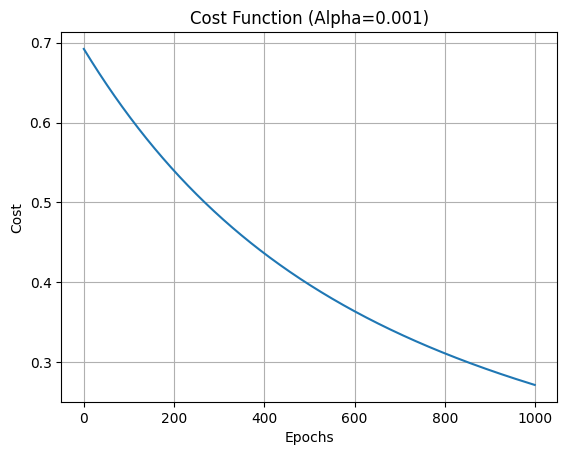

In [ ]:
_, cost_history = gradient_descent(X_train, y_train, best_alpha, epochs)
plt.plot(cost_history)
plt.title(f"Cost Function (Alpha={best_alpha})")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.grid(True)
plt.show()

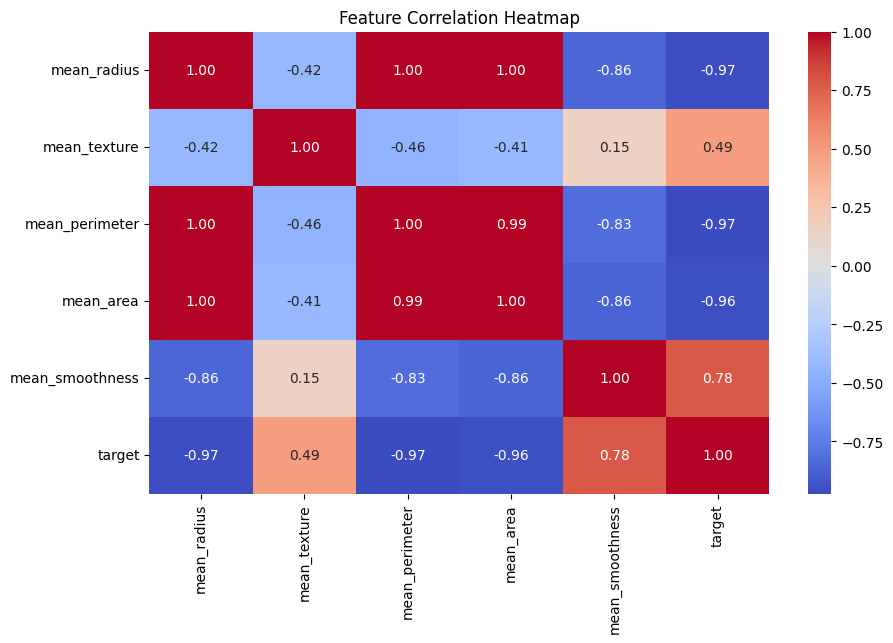

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

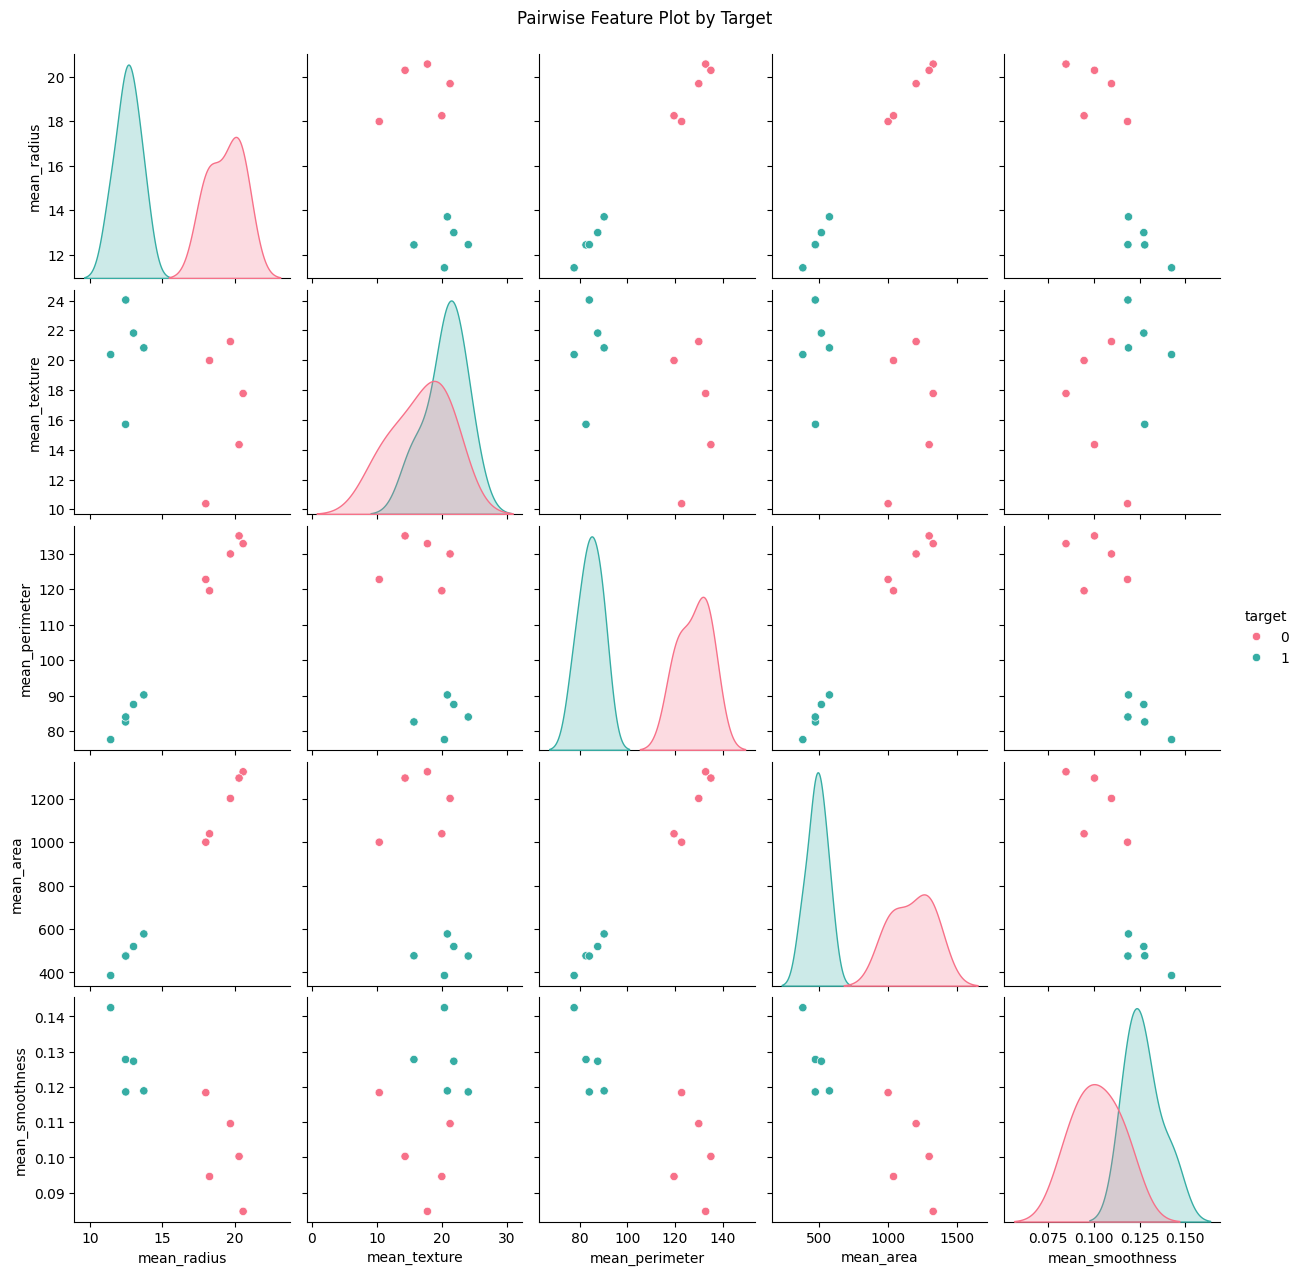

In [ ]:
import seaborn as sns

sns.pairplot(df, hue="target", diag_kind="kde", palette="husl")
plt.suptitle("Pairwise Feature Plot by Target", y=1.02)
plt.show()

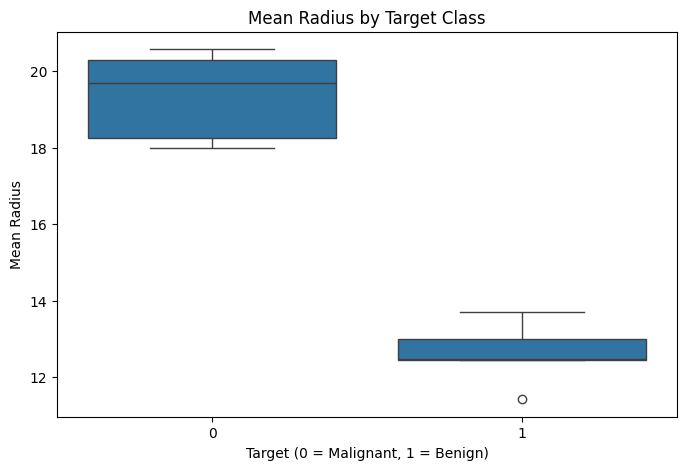

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='target', y='mean_radius', data=df)
plt.title("Mean Radius by Target Class")
plt.xlabel("Target (0 = Malignant, 1 = Benign)")
plt.ylabel("Mean Radius")
plt.show()

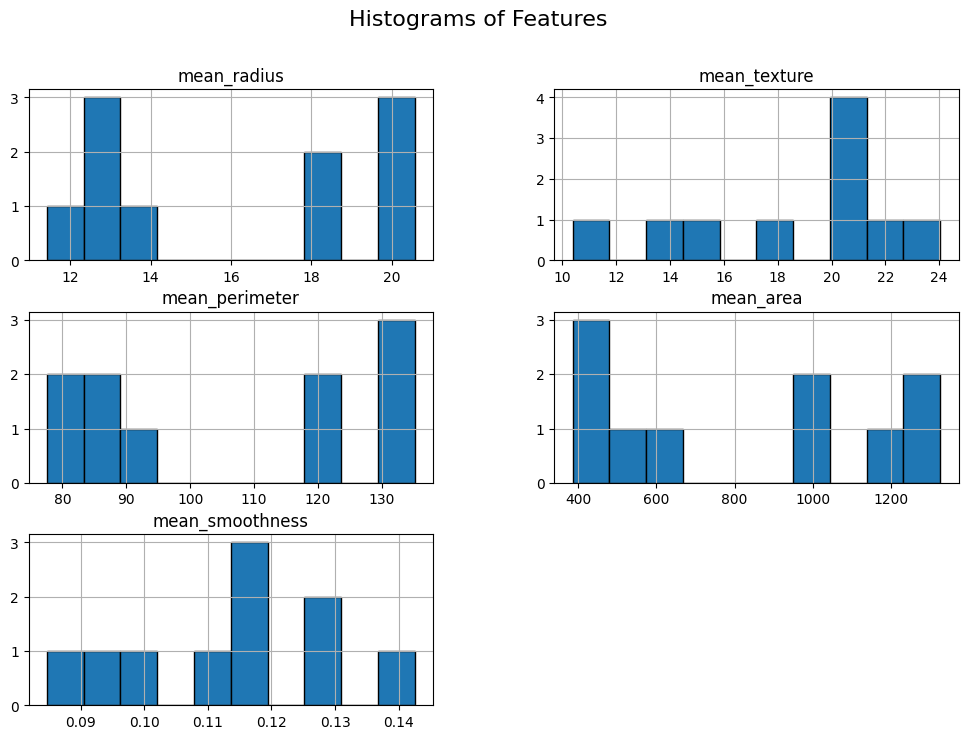

In [ ]:
features = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness']

df[features].hist(figsize=(12, 8), bins=10, edgecolor='black')
plt.suptitle("Histograms of Features", fontsize=16)
plt.show()

/tmp/ipython-input-16-3797855612.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


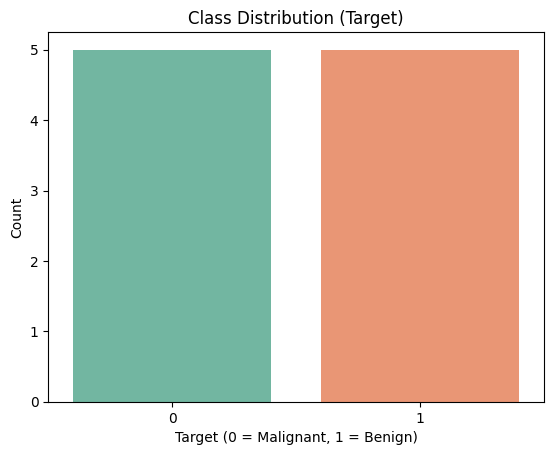

In [ ]:
sns.countplot(x='target', data=df, palette='Set2')
plt.title("Class Distribution (Target)")
plt.xlabel("Target (0 = Malignant, 1 = Benign)")
plt.ylabel("Count")
plt.show()